# Machine Learning - PCA, RF, Logistic Regression, MLP models on heart disease dataset

In [1]:
# Library importing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import itertools
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor

## Data Loading and Editing

In [5]:
df = pd.read_csv("heart_disease_uci.csv")

In [7]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
df = df.drop(columns = ['id', 'dataset'])

## Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [15]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


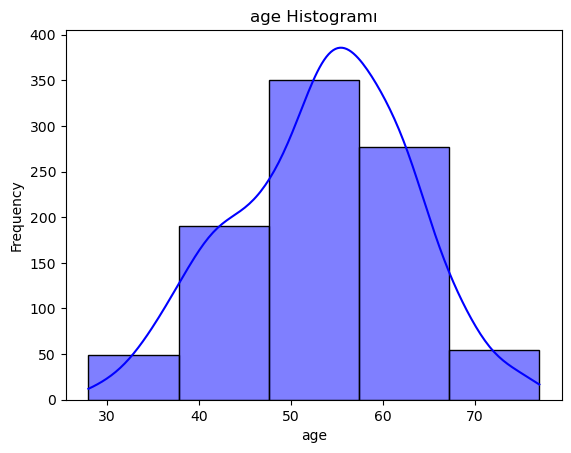

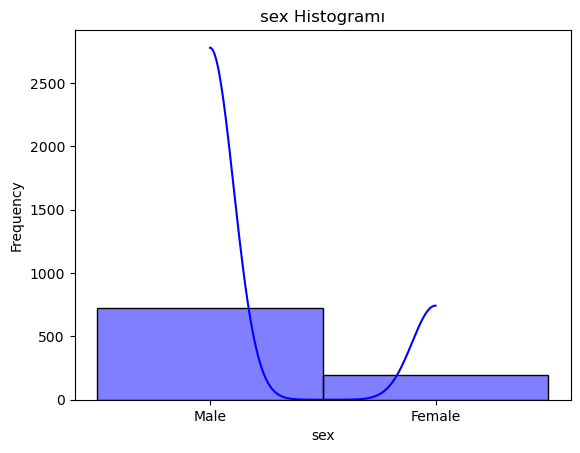

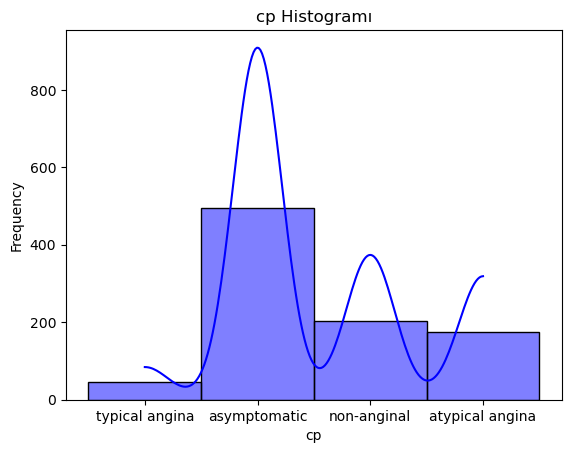

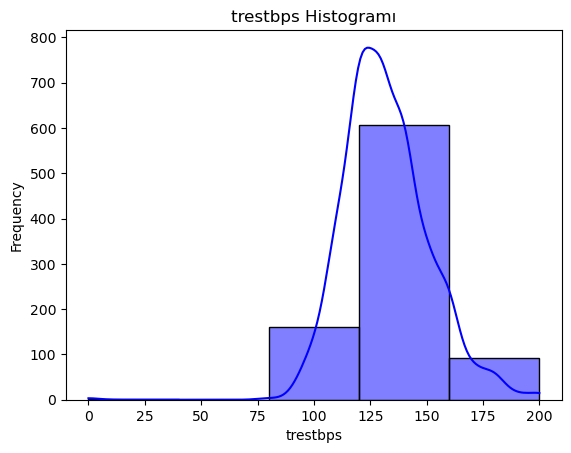

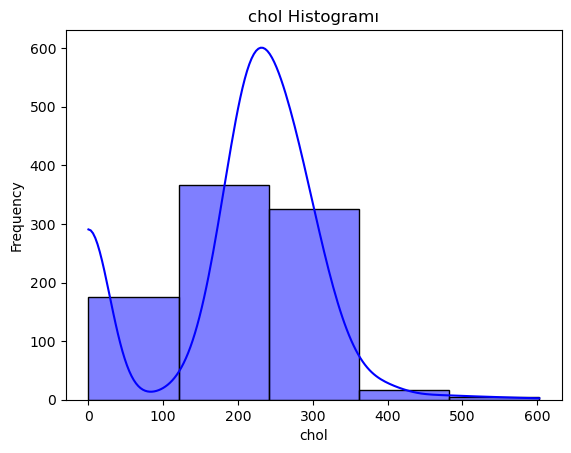

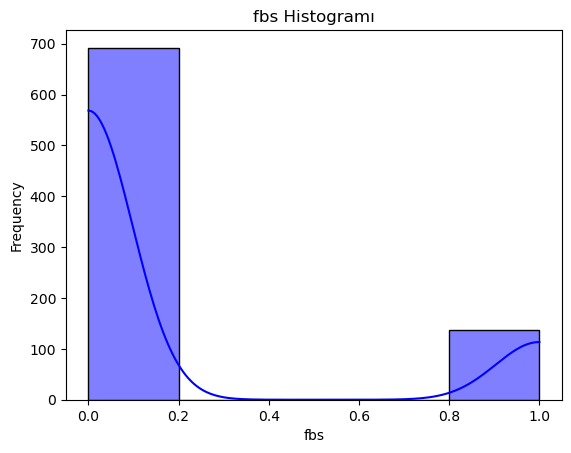

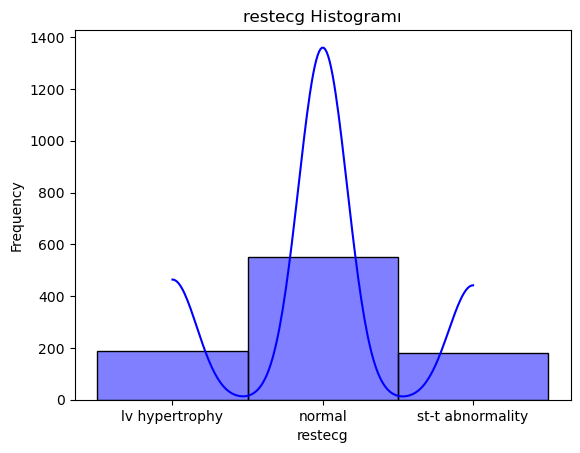

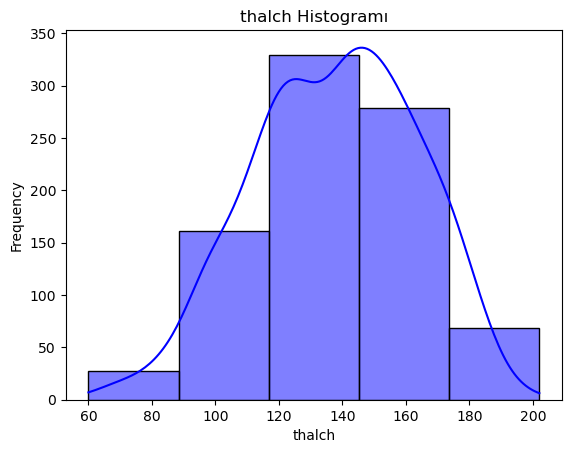

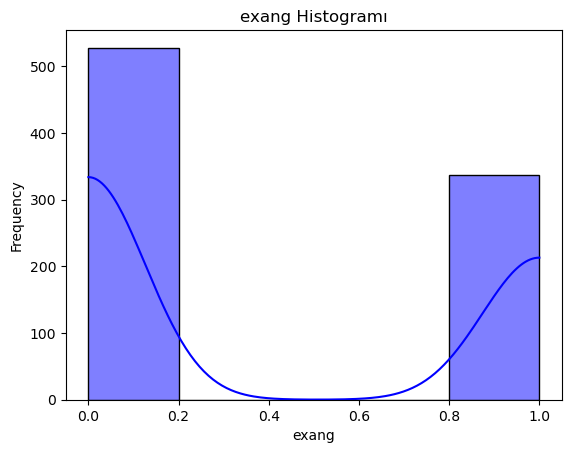

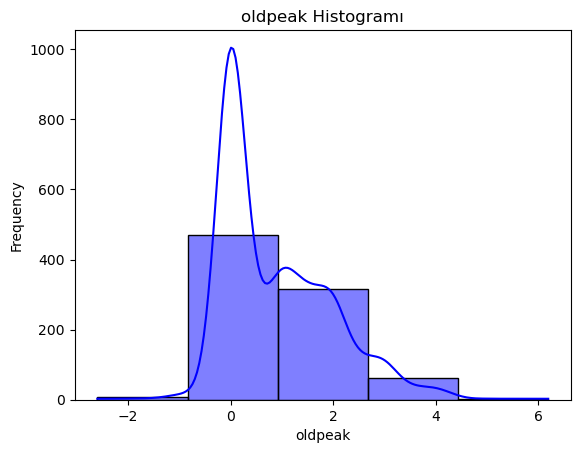

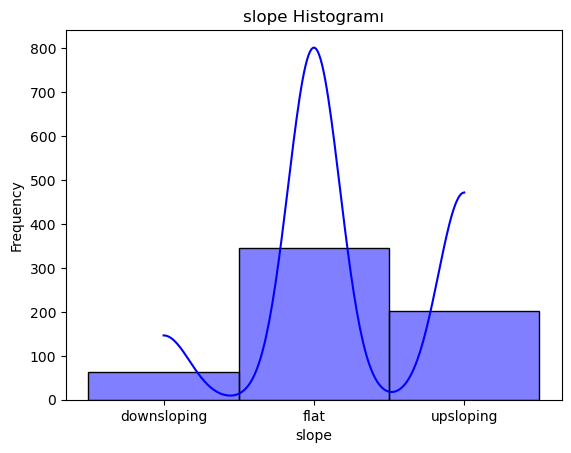

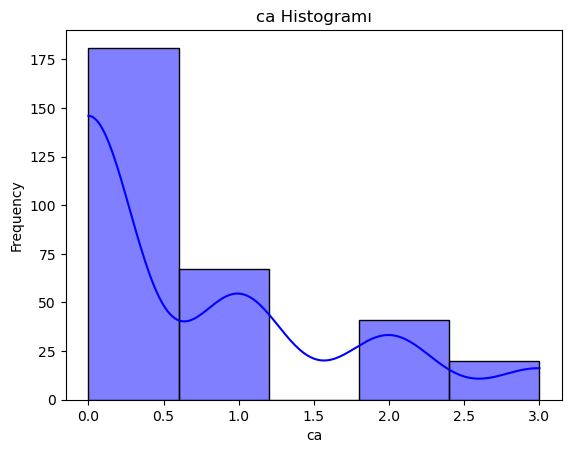

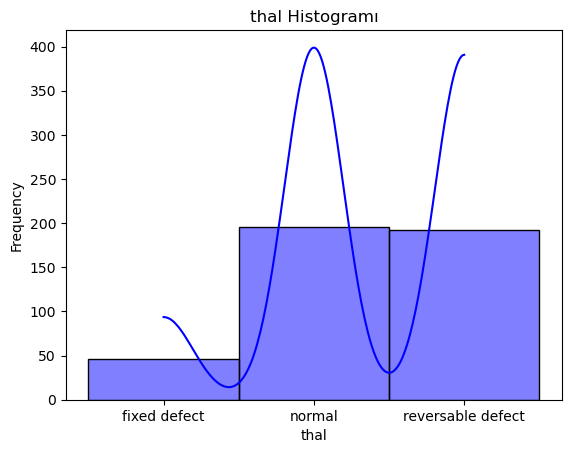

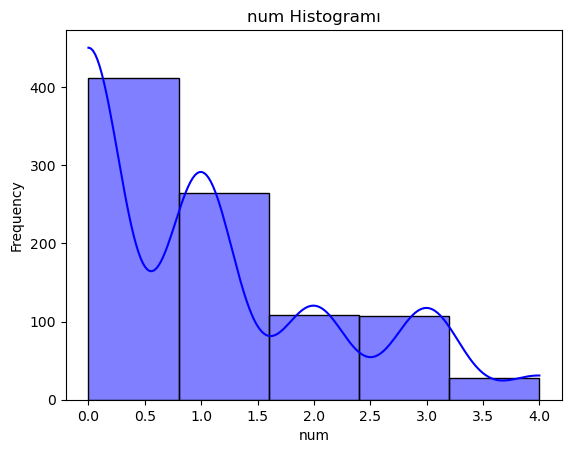

In [17]:
for column in df.columns:
    sns.histplot(df[column], kde=True, bins=5, color='blue')
    plt.title(f'{column} Histogramı')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.show()

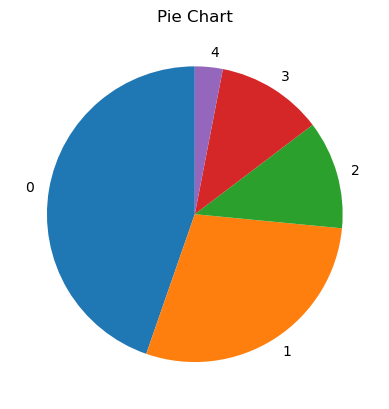

In [19]:
#Pie Chart to see heart disease ratio
categories = df.num
category_sizes = categories.value_counts()

labels = category_sizes.index  
sizes = category_sizes.values 

plt.pie(sizes, labels=labels, startangle=90)

plt.title('Pie Chart')

plt.show()

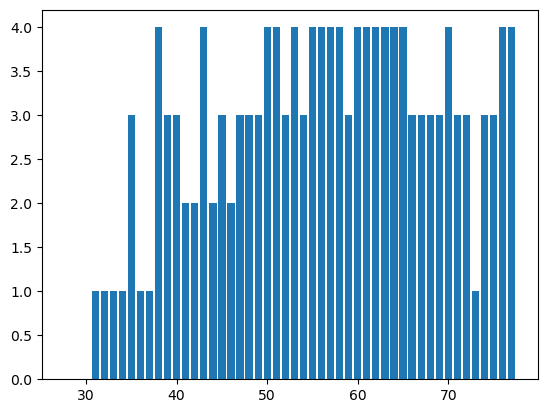

In [21]:
plt.bar(df.age,df.num)
plt.show()

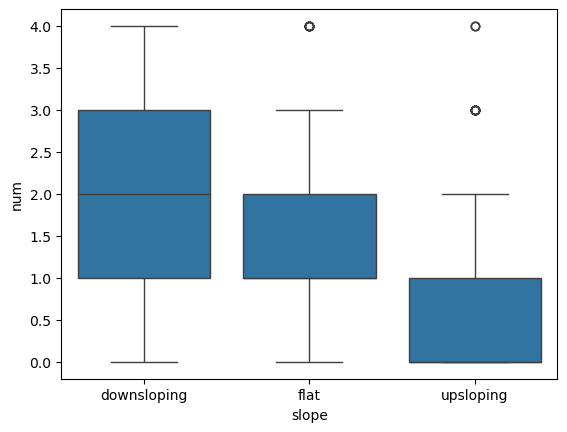

In [23]:
sns.boxplot(x=df.slope, y=df.num, data=df)
plt.show()

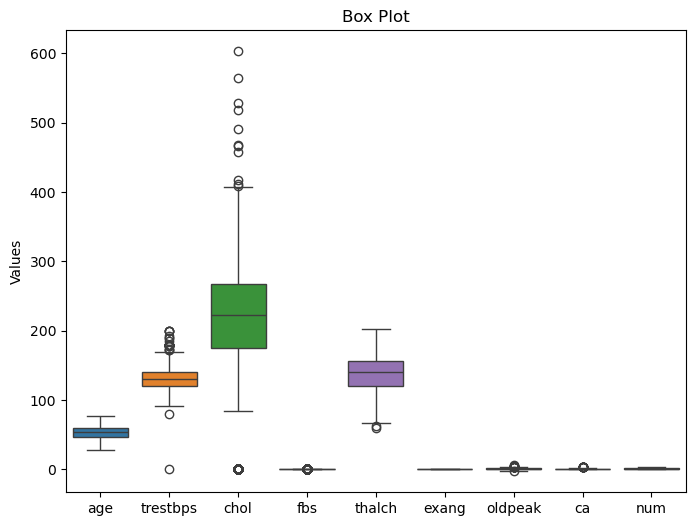

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(df)

plt.title('Box Plot')
plt.ylabel('Values')

plt.show()

## Encoding

In [27]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [29]:
def encoder(data, column, encode_type, sizes):
    if encode_type == "One-Hot Encoding":
        data = pd.get_dummies(data, columns=[column], dummy_na=False)
        return data
    elif encode_type == "Ordinal Encoding":
        oe = OrdinalEncoder(categories=[sizes], handle_unknown='use_encoded_value', unknown_value=np.nan)
        data[column] = oe.fit_transform(data[[column]])
        return data

In [31]:
sizes_cp = ["typical angina", "atypical angina", "non-anginal", "asymptomatic"]
df_e = encoder(df, 'cp', "Ordinal Encoding", sizes_cp)

In [33]:
sizes_restecg =  ["normal", "stt abnormality", "lv hypertrophy"]
df_e = encoder(df_e, 'restecg', "Ordinal Encoding", sizes_restecg)

In [35]:
sizes_thal =  ["normal", "fixed defect", "reversable defect"]
df_e = encoder(df_e, 'thal', "Ordinal Encoding", sizes_thal)

In [37]:
df_e = encoder(df_e, 'slope', "One-Hot Encoding", None)

In [39]:
df_e

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,num,slope_downsloping,slope_flat,slope_upsloping
0,63,1,0.0,145.0,233.0,True,2.0,150.0,False,2.3,0.0,1.0,0,True,False,False
1,67,1,3.0,160.0,286.0,False,2.0,108.0,True,1.5,3.0,0.0,2,False,True,False
2,67,1,3.0,120.0,229.0,False,2.0,129.0,True,2.6,2.0,2.0,1,False,True,False
3,37,1,2.0,130.0,250.0,False,0.0,187.0,False,3.5,0.0,0.0,0,True,False,False
4,41,0,1.0,130.0,204.0,False,2.0,172.0,False,1.4,0.0,0.0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,3.0,127.0,333.0,True,NaN,154.0,False,0.0,NaN,NaN,1,False,False,False
916,62,1,0.0,NaN,139.0,False,NaN,NaN,NaN,NaN,NaN,NaN,0,False,False,False
917,55,1,3.0,122.0,223.0,True,NaN,100.0,False,0.0,NaN,1.0,2,False,False,False
918,58,1,3.0,NaN,385.0,True,2.0,NaN,NaN,NaN,NaN,NaN,0,False,False,False


In [41]:
df_e = df_e.drop(columns = 'slope_upsloping')
df_e

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,num,slope_downsloping,slope_flat
0,63,1,0.0,145.0,233.0,True,2.0,150.0,False,2.3,0.0,1.0,0,True,False
1,67,1,3.0,160.0,286.0,False,2.0,108.0,True,1.5,3.0,0.0,2,False,True
2,67,1,3.0,120.0,229.0,False,2.0,129.0,True,2.6,2.0,2.0,1,False,True
3,37,1,2.0,130.0,250.0,False,0.0,187.0,False,3.5,0.0,0.0,0,True,False
4,41,0,1.0,130.0,204.0,False,2.0,172.0,False,1.4,0.0,0.0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,3.0,127.0,333.0,True,NaN,154.0,False,0.0,NaN,NaN,1,False,False
916,62,1,0.0,NaN,139.0,False,NaN,NaN,NaN,NaN,NaN,NaN,0,False,False
917,55,1,3.0,122.0,223.0,True,NaN,100.0,False,0.0,NaN,1.0,2,False,False
918,58,1,3.0,NaN,385.0,True,2.0,NaN,NaN,NaN,NaN,NaN,0,False,False


## Handling the missing values

In [51]:
nan_rows = df_e[df_e.isna().any(axis=1)]
nan_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,num,slope_downsloping,slope_flat
87,53,0,2.0,128.0,216.0,False,2.0,115.0,False,0.0,0.0,NaN,0,False,False
166,52,1,2.0,138.0,223.0,False,0.0,169.0,False,0.0,NaN,0.0,0,False,False
192,43,1,3.0,132.0,247.0,True,2.0,143.0,True,0.1,NaN,2.0,1,False,True
231,55,0,3.0,180.0,327.0,False,NaN,117.0,True,3.4,0.0,0.0,2,False,True
257,76,0,2.0,140.0,197.0,False,NaN,116.0,False,1.1,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,3.0,127.0,333.0,True,NaN,154.0,False,0.0,NaN,NaN,1,False,False
916,62,1,0.0,NaN,139.0,False,NaN,NaN,NaN,NaN,NaN,NaN,0,False,False
917,55,1,3.0,122.0,223.0,True,NaN,100.0,False,0.0,NaN,1.0,2,False,False
918,58,1,3.0,NaN,385.0,True,2.0,NaN,NaN,NaN,NaN,NaN,0,False,False


In [55]:
features = df_e.drop(columns='num')
target = df_e.num
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=100, random_state=0)
imputed_data = imputer.fit_transform(features)
imputed_df = pd.DataFrame(imputed_data, columns=features.columns)
imputed_df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,slope_downsloping,slope_flat
0,63.0,1.0,0.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,1.0,1.0,0.0
1,67.0,1.0,3.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,3.0,0.0,0.0,1.0
2,67.0,1.0,3.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,0.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0.0,1.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,3.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,3.0,2.0,0.0,0.0
916,62.0,1.0,0.0,120.0,139.0,0.0,0.0,179.0,0.0,0.0,1.0,2.0,0.0,0.0
917,55.0,1.0,3.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,2.0,1.0,0.0,0.0
918,58.0,1.0,3.0,155.0,385.0,1.0,2.0,148.0,1.0,2.5,1.0,2.0,0.0,0.0


In [57]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                920 non-null    float64
 1   sex                920 non-null    float64
 2   cp                 920 non-null    float64
 3   trestbps           920 non-null    float64
 4   chol               920 non-null    float64
 5   fbs                920 non-null    float64
 6   restecg            920 non-null    float64
 7   thalch             920 non-null    float64
 8   exang              920 non-null    float64
 9   oldpeak            920 non-null    float64
 10  ca                 920 non-null    float64
 11  thal               920 non-null    float64
 12  slope_downsloping  920 non-null    float64
 13  slope_flat         920 non-null    float64
dtypes: float64(14)
memory usage: 100.8 KB


In [59]:
df.describe()

,age,sex,cp,trestbps,chol,restecg,thalch,oldpeak,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,739.000000,865.000000,858.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,2.250000,132.132404,199.130337,0.508796,137.545665,0.878788,0.676375,0.990783,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.871634,25.926276,1.091226,0.935653,0.946567,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,140.000000,0.500000,0.000000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,268.000000,2.000000,157.000000,1.500000,1.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,2.000000,202.000000,6.200000,3.000000,2.000000,4.000000


##  PCA and T-SNE visualization

In [64]:
#For use the color map:
PALETTE = sns.color_palette('deep', n_colors=2)
CMAP = ListedColormap(PALETTE.as_hex())

In [80]:
#Function to plot 2D 
def plot_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")

    plt.scatter(x, y,
        c=target,
        cmap=CMAP,
        s=70)

    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [88]:
#Standard Scaling for features and assign it to new dataframe
scaler = StandardScaler()
dfs = scaler.fit_transform(imputed_df)

In [92]:
dfs = pd.DataFrame(dfs, columns=imputed_df.columns)

In [94]:
dfs

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,slope_downsloping,slope_flat
0,1.007386,0.516931,-2.418152,0.669786,0.297530,2.230252,1.683251,0.493190,-0.792665,1.342026,-0.777573,-0.043954,3.688248,-0.774597
1,1.432034,0.516931,0.806051,1.463180,0.776216,-0.448380,1.683251,-1.125915,1.261566,0.600319,2.253645,-1.108099,-0.271131,1.290994
2,1.432034,0.516931,0.806051,-0.652538,0.261402,-0.448380,1.683251,-0.316362,1.261566,1.620166,1.243239,1.020191,-0.271131,1.290994
3,-1.752828,0.516931,-0.268684,-0.123609,0.451070,-0.448380,-0.594089,1.919545,-0.792665,2.454586,-0.777573,-1.108099,3.688248,-0.774597
4,-1.328180,-1.934494,-1.343418,-0.123609,0.035607,-0.448380,1.683251,1.341293,-0.792665,0.507606,-0.777573,-1.108099,-0.271131,-0.774597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.051927,-1.934494,0.806051,-0.282287,1.200711,2.230252,1.683251,0.647391,-0.792665,-0.790381,2.253645,1.020191,-0.271131,-0.774597
916,0.901224,0.516931,-2.418152,-0.652538,-0.551461,-0.448380,-0.594089,1.611144,-0.792665,-0.790381,0.232833,1.020191,-0.271131,-0.774597
917,0.158089,0.516931,0.806051,-0.546752,0.207211,2.230252,1.683251,-1.434316,-0.792665,-0.790381,1.243239,-0.043954,-0.271131,-0.774597
918,0.476575,0.516931,0.806051,1.198716,1.670366,2.230252,1.683251,0.416090,1.261566,1.527453,0.232833,1.020191,-0.271131,-0.774597


In [96]:
#features contains column names and target contains diagnosis column
feature_names = dfs.columns.tolist()
target = df_e.num

In [98]:
#Applying PCA
pca = PCA()
points = pca.fit_transform(dfs[feature_names])

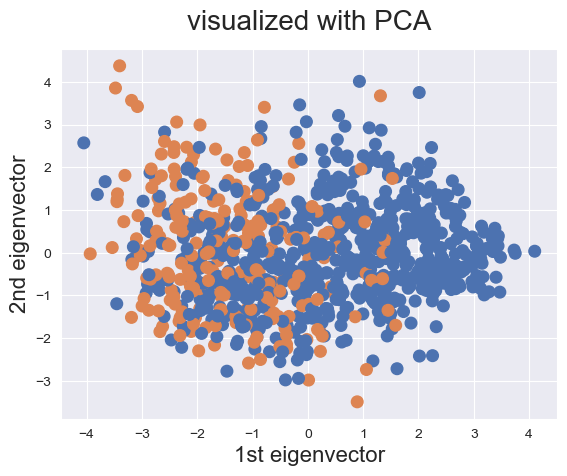

In [100]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'visualized with PCA')

In [102]:
#Applying T-SNE
tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
points = tsne.fit_transform(dfs[feature_names])

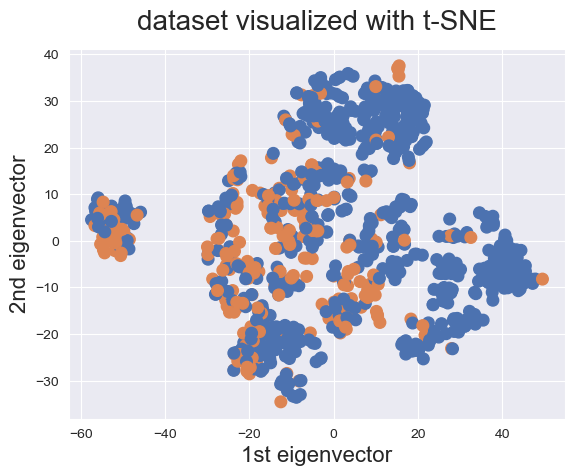

In [104]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'dataset visualized with t-SNE')

In [180]:
#The graph I created with t-sne managed to create a slightly more clustered distribution.

## Explained and Cumulative variance ratio

In [107]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.22168562, 0.1077964 , 0.09875723, 0.08600418, 0.07215975,
       0.0697771 , 0.06023936, 0.05493046, 0.04790057, 0.04579912,
       0.04211183, 0.03509917, 0.03299429, 0.02474493])

In [109]:
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {ratio:.4f}")

Explained Variance Ratio for each component:
Principal Component 1: 0.2217
Principal Component 2: 0.1078
Principal Component 3: 0.0988
Principal Component 4: 0.0860
Principal Component 5: 0.0722
Principal Component 6: 0.0698
Principal Component 7: 0.0602
Principal Component 8: 0.0549
Principal Component 9: 0.0479
Principal Component 10: 0.0458
Principal Component 11: 0.0421
Principal Component 12: 0.0351
Principal Component 13: 0.0330
Principal Component 14: 0.0247


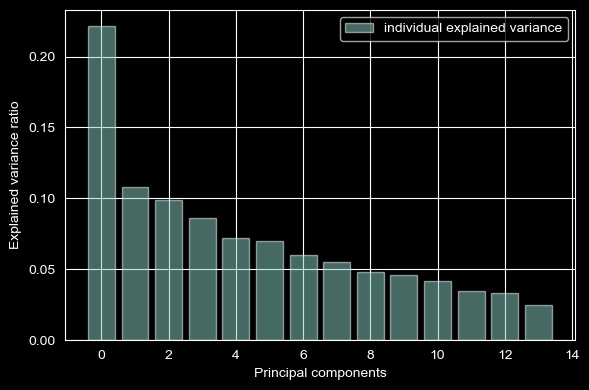

In [113]:
#Plotting explained variance ratio per components
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(14), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [115]:
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.22168562 0.32948202 0.42823925 0.51424343 0.58640318 0.65618028
 0.71641964 0.7713501  0.81925067 0.86504978 0.90716161 0.94226078
 0.97525507 1.        ]


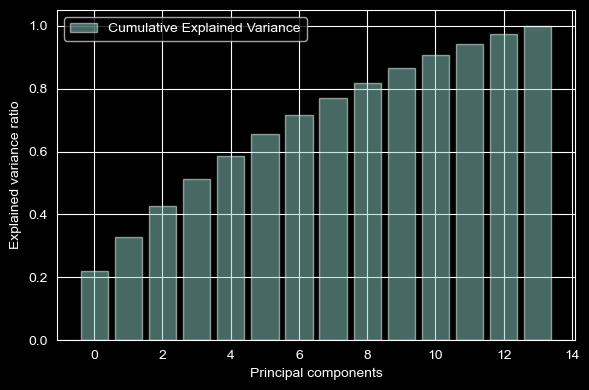

In [117]:
#Plotting cumulative variance ratio per components
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(14), cumulative_variance, alpha=0.5, align='center',
            label='Cumulative Explained Variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Logistic Regression Models

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [122]:
#Original scaled features
X = dfs
y = df_e.num

In [124]:
#Train | Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
#Score printer function - Accuracy, Classification Report and Confusion Matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [128]:
#Building model and showing scores
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 60.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1          2          3      4  accuracy  \
precision    0.731638    0.470339   0.294118   0.437500   0.40  0.607143   
recall       0.890034    0.593583   0.066667   0.197183   0.10  0.607143   
f1-score     0.803101    0.524823   0.108696   0.271845   0.16  0.607143   
support    291.000000  187.000000  75.000000  71.000000  20.00  0.607143   

            macro avg  weighted avg  
precision    0.466719      0.562083  
recall       0.369493      0.607143  
f1-score     0.373693      0.562884  
support    644.000000    644.000000  
_______________________________________________
Confusion Matrix: 
 [[259  25   4   3   0]
 [ 67 111   5   4   0]
 [ 20  41   5   7   2]
 [  7  48   1  14   1]
 [  1  11   2   4   2]]

Test Result:
Accuracy Score: 55.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0        

## Logistic Regression with 2d features

In [135]:
X_2d = dfs[['age', 'sex']]

In [137]:
#Train | Test Split
X_trained, X_tested, y_trained, y_tested = train_test_split(X_2d, y, test_size=0.3, random_state=42)

In [139]:
##Building model and showing scores
lr_clf_2d = LogisticRegression(solver='liblinear')
lr_clf_2d.fit(X_trained, y_trained)

print_score(lr_clf_2d, X_trained, y_trained, X_tested, y_tested, train=True)
print_score(lr_clf_2d, X_trained, y_trained, X_tested, y_tested, train=False)

Train Result:
Accuracy Score: 47.20%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1     2          3     4  accuracy  \
precision    0.565432    0.311111   0.0   0.357143   0.0   0.47205   
recall       0.786942    0.374332   0.0   0.070423   0.0   0.47205   
f1-score     0.658046    0.339806   0.0   0.117647   0.0   0.47205   
support    291.000000  187.000000  75.0  71.000000  20.0   0.47205   

            macro avg  weighted avg  
precision    0.246737      0.385211  
recall       0.246339      0.472050  
f1-score     0.223100      0.408988  
support    644.000000    644.000000  
_______________________________________________
Confusion Matrix: 
 [[229  58   0   4   0]
 [115  70   0   2   0]
 [ 24  50   0   1   0]
 [ 29  37   0   5   0]
 [  8  10   0   2   0]]

Test Result:
Accuracy Score: 48.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1     2          3    4  acc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

## MLP with original features

In [142]:
from sklearn.neural_network import MLPClassifier

In [144]:
clf = MLPClassifier(hidden_layer_sizes=(32, 16), activation = 'relu', solver='sgd', alpha=0.2, batch_size=32)

In [146]:
clf.fit(X_train, y_train)
print(f'Train Accuracy = {clf.score(X_train, y_train)}')
print(f'Test Accuracy = {clf.score(X_test, y_test)}')

Train Accuracy = 0.6708074534161491
Test Accuracy = 0.532608695652174


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


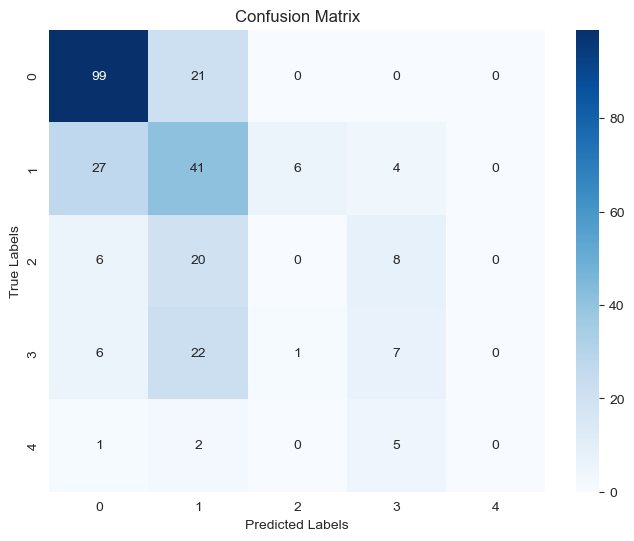

In [186]:
#Making predictions on set and show confusion matrix
y_true = y_test
y_pred = clf.predict(X_test) 

confusion_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### MLP with 2D

In [149]:
clf2d = MLPClassifier(hidden_layer_sizes=(32, 16), activation = 'relu', solver='sgd', alpha=0.2, batch_size=32)

In [153]:
clf2d.fit(X_trained, y_trained)
print(f'Train Accuracy = {clf2d.score(X_trained, y_trained)}')
print(f'Test Accuracy = {clf2d.score(X_tested, y_tested)}')

Train Accuracy = 0.468944099378882
Test Accuracy = 0.4492753623188406


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


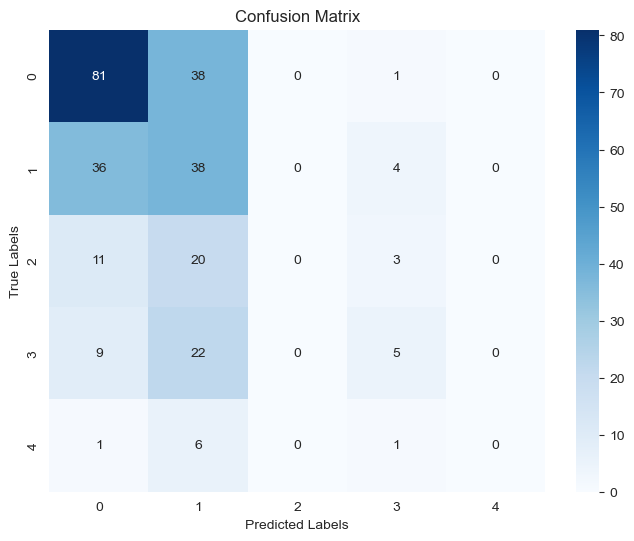

In [190]:
#Making predictions on set and show confusion matrix
y_true = y_tested
y_pred = clf2d.predict(X_tested) 

confusion_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf2d.classes_, yticklabels=clf2d.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Models

### Original features

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 4,
                                             max_leaf_nodes = 18,
                                             min_samples_split = 100).fit(X_train,y_train)

In [163]:
#Print the accuracy score of model
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.5901
Metrics test:
	Accuracy score: 0.5616


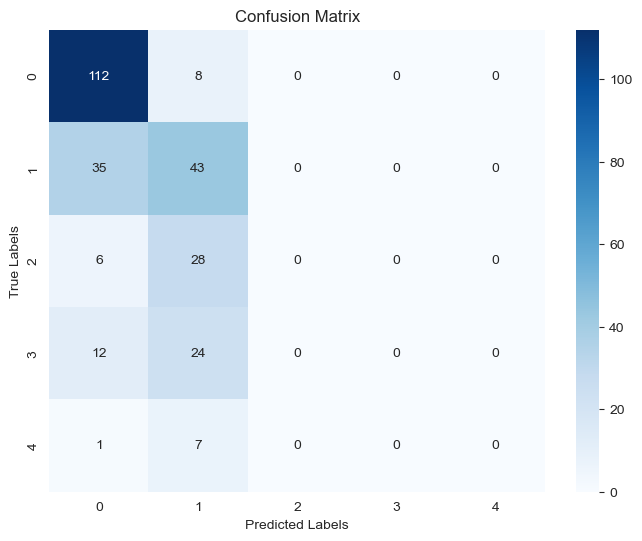

In [169]:
#Making predictions on set and show confusion matrix
y_true = y_test
y_pred = random_forest_model.predict(X_test) 

confusion_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [173]:
#classification report of the model
report_rf = classification_report(y_test, y_pred, output_dict=True)
report_rf = pd.DataFrame(report_rf).transpose()
report_rf

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.674699,0.933333,0.783217,120.000000
1,0.390909,0.551282,0.457447,78.000000
2,0.000000,0.000000,0.000000,34.000000
3,0.000000,0.000000,0.000000,36.000000
4,0.000000,0.000000,0.000000,8.000000
accuracy,0.561594,0.561594,0.561594,0.561594
macro avg,0.213122,0.296923,0.248133,276.000000
weighted avg,0.403822,0.561594,0.469807,276.000000


## Random forest with 2d

In [193]:
random_forest_model2d = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 4,
                                             max_leaf_nodes = 18,
                                             min_samples_split = 100).fit(X_trained,y_trained)

In [195]:
#Print the accuracy score of model
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model2d.predict(X_trained),y_trained):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model2d.predict(X_tested),y_tested):.4f}")

Metrics train:
	Accuracy score: 0.4938
Metrics test:
	Accuracy score: 0.4493


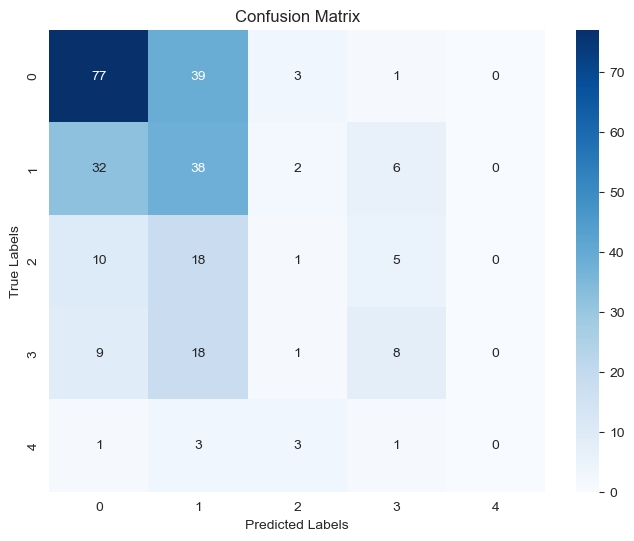

In [197]:
#Making predictions on set and show confusion matrix
y_true = y_tested
y_pred = random_forest_model2d.predict(X_tested) 

confusion_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model2d.classes_, yticklabels=random_forest_model2d.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [199]:
#classification report of the model
report_rf2d = classification_report(y_tested, y_pred, output_dict=True)
report_rf2d = pd.DataFrame(report_rf2d).transpose()
report_rf2d

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.596899,0.641667,0.618474,120.000000
1,0.327586,0.487179,0.391753,78.000000
2,0.100000,0.029412,0.045455,34.000000
3,0.380952,0.222222,0.280702,36.000000
4,0.000000,0.000000,0.000000,8.000000
accuracy,0.449275,0.449275,0.449275,0.449275
macro avg,0.281088,0.276096,0.267277,276.000000
weighted avg,0.414108,0.449275,0.421827,276.000000


## Result: MLP (original features) model showed the best performance with %67 accuracy score